# Modeling Airbnb prices


## Data Preprocessing


In [1]:
import random
random.seed(42)

In [2]:
import pandas as pd

listings_file_path = 'listings.csv.gz' 
listings = pd.read_csv(listings_file_path, compression="gzip", low_memory=False)
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

### Feature selection


In [3]:
useless = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
listings.drop(useless, axis=1, inplace=True)

In [4]:
listings.drop(listings.filter(regex = 'review').columns, axis = 1, inplace = True)
listings.columns

Index(['host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

#### Selection on Missing Data 


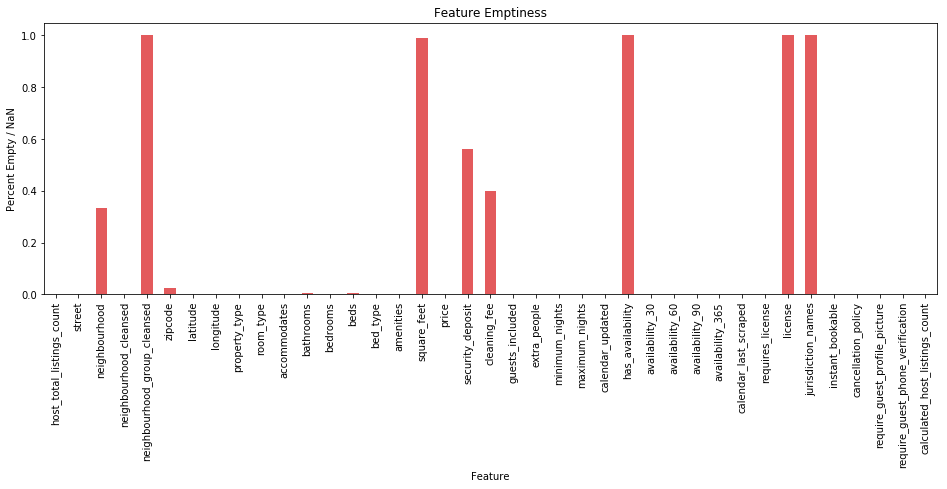

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

percentage_missing_data = listings.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [6]:
useless = ['neighbourhood', 'neighbourhood_group_cleansed', 'square_feet', 'security_deposit', 'cleaning_fee', 
           'has_availability', 'license', 'jurisdiction_names']
listings.drop(useless, axis=1, inplace=True)

#### Selection on Sparse Categorical Features


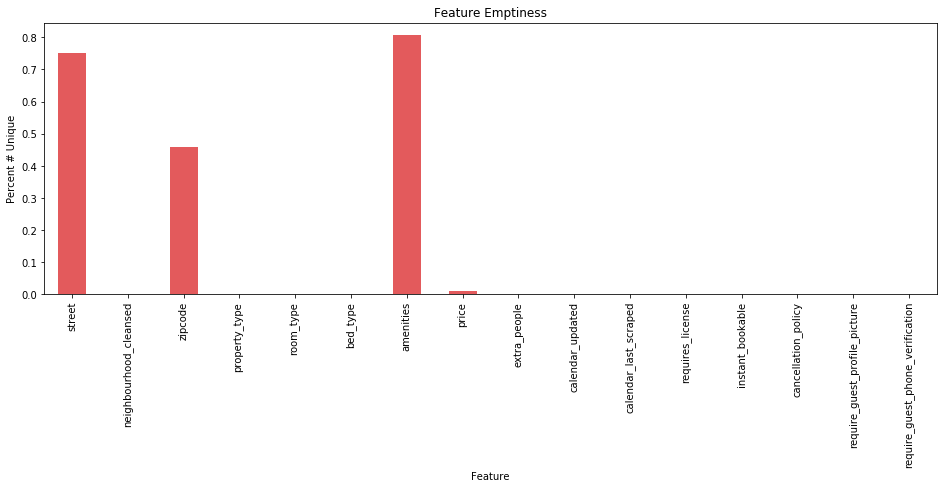

In [7]:
categories = listings.columns[listings.dtypes == 'object']
percentage_unique = listings[categories].nunique() / listings.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

In [8]:
to_drop = ['street', 'amenities', 'calendar_last_scraped', 'calendar_updated']
listings.drop(to_drop, axis=1, inplace=True)

In [9]:
print("Number of Zipcodes:", listings['zipcode'].nunique())

Number of Zipcodes: 24774


In [10]:
listings['zipcode'] = listings['zipcode'].str.slice(0,3)
listings['zipcode'] = listings['zipcode'].fillna("OTHER")
print("Number of Zipcodes:", listings['zipcode'].nunique())

Number of Zipcodes: 461


In [11]:
listings.head()

host_total_listings_count neighbourhood_cleansed zipcode   latitude  \
0                        1.0   Kingston upon Thames     KT1  51.410036   
1                        1.0   Kingston upon Thames     KT2  51.411482   
2                        1.0   Kingston upon Thames     KT2  51.415851   
3                        1.0   Kingston upon Thames     KT2  51.415723   
4                        1.0   Kingston upon Thames     KT3  51.404285   

   longitude property_type     room_type  accommodates  bathrooms  bedrooms  \
0  -0.306323     Apartment  Private room             1        1.0       1.0   
1  -0.290704     Apartment  Private room             2        1.0       1.0   
2  -0.286496     Apartment  Private room             2        1.0       1.0   
3  -0.292246         House  Private room             2        1.5       1.0   
4  -0.275426         House  Private room             1        1.0       1.0   

                ...                availability_30 availability_60  \
0               ...                              1              31   
1               ...                             29              59   
2               ...                              0               0   
3               ...                              0               0   
4               ...                             29              59   

  availability_90  availability_365 requires_license  instant_bookable  \
0              61                61                f                 f   
1              89               364                f                 f   
2               0                 0                f                 f   
3               0                 0                f                 f   
4              89               179                f                 f   

   cancellation_policy  require_guest_profile_picture  \
0             flexible                              f   
1             moderate                              f   
2             flexible                              f   
3             flexible                              f   
4             flexible                              f   

   require_guest_phone_verification  calculated_host_listings_count  
0                                 f                               1  
1                                 f                               1  
2                                 f                               1  
3                                 f                               1  
4                                 f                               1  

[5 rows x 27 columns]

In [12]:
count_per_zipcode = listings['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

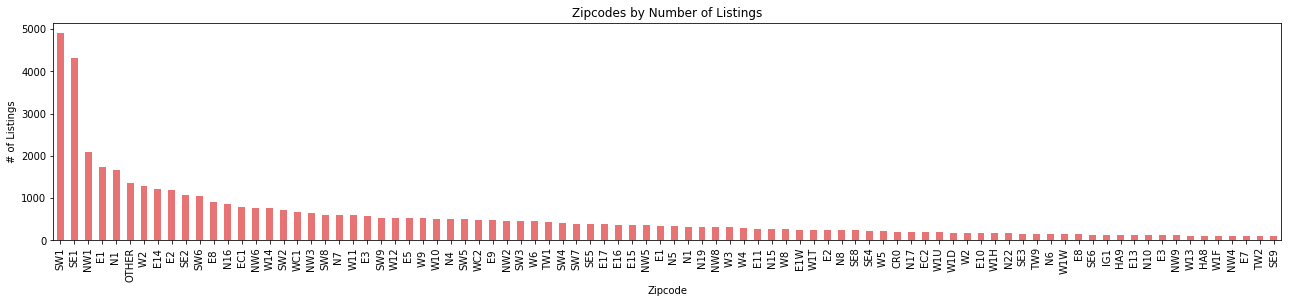

Number of entries removed:  5484


In [13]:
relevant_zipcodes = count_per_zipcode[count_per_zipcode > 100].index
listings_zip_filtered = listings[listings['zipcode'].isin(relevant_zipcodes)]

# Plot new zipcodes distribution
count_per_zipcode = listings_zip_filtered['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_zip_filtered.shape[0])

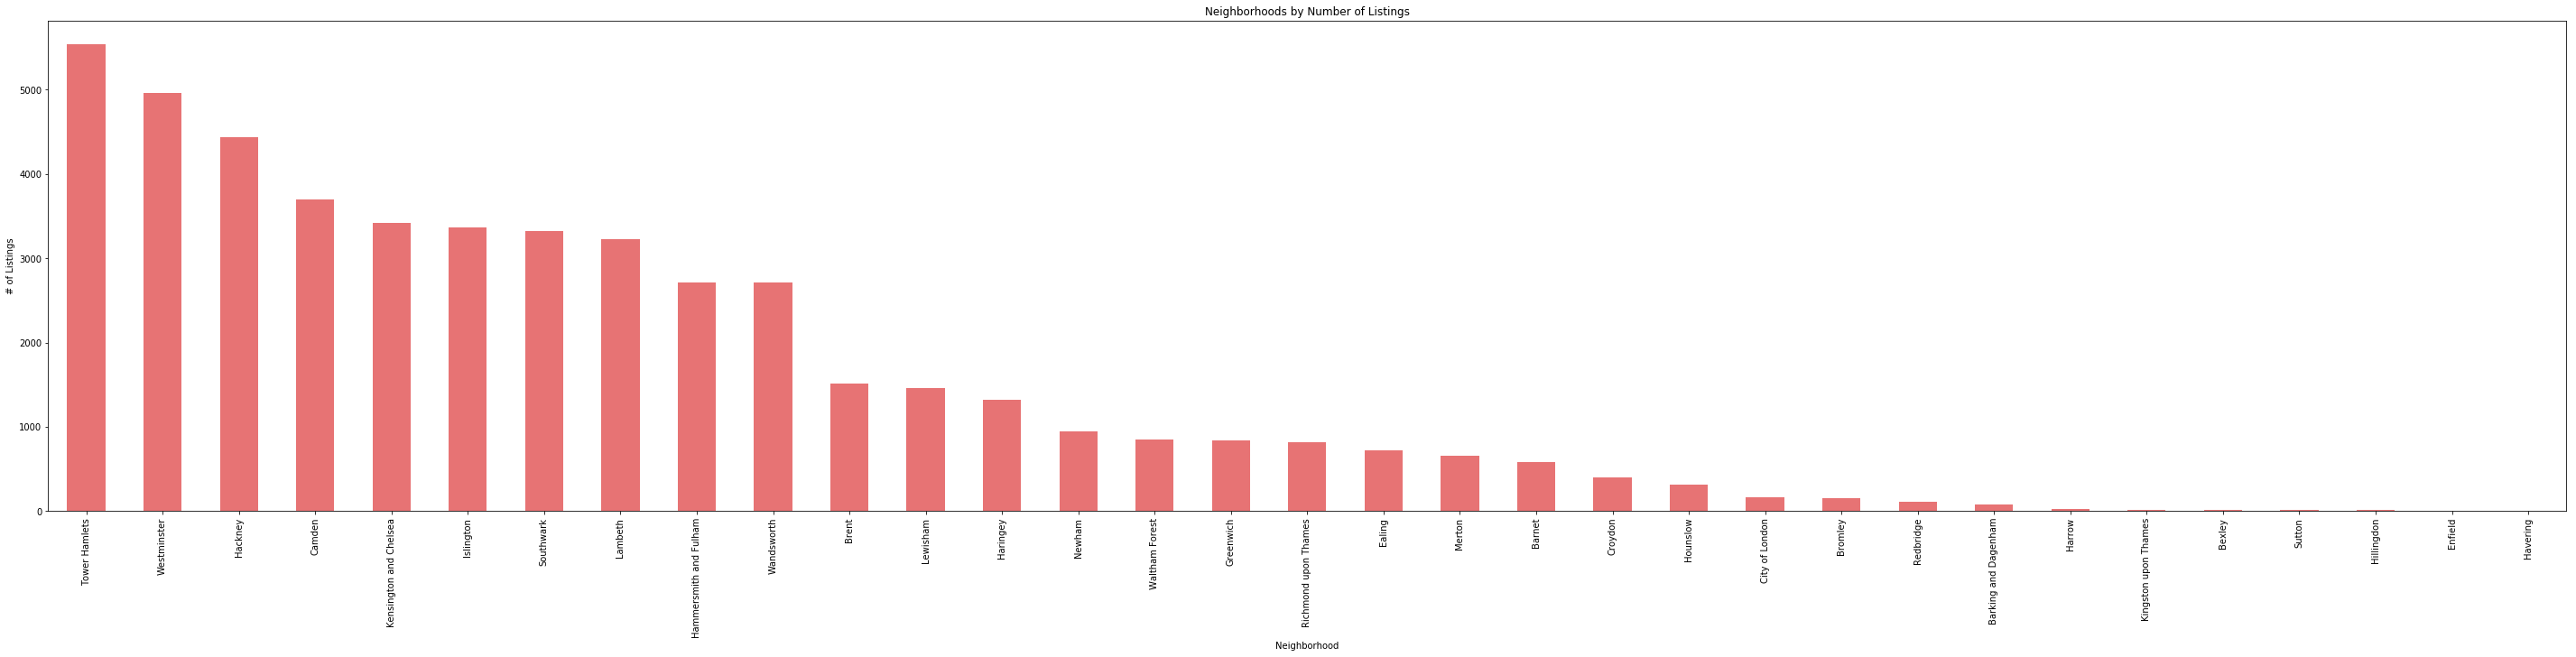

Number of Neighborhoods: 33


In [14]:
# Focus on neighbourhood_cleansed

# Get number of listings in neighborhoods
count_per_neighborhood = listings_zip_filtered['neighbourhood_cleansed'].value_counts()

# Plot number of listings in each neighborhood
ax = count_per_neighborhood.plot(kind='bar', figsize = (50,10), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))

In [15]:
relevant_neighborhoods = count_per_neighborhood[count_per_neighborhood > 100].index
listings_neighborhood_filtered = listings_zip_filtered[listings_zip_filtered['neighbourhood_cleansed'].isin(relevant_neighborhoods)]

# Plot new neighborhoods distribution
count_per_neighborhood = listings_neighborhood_filtered['neighbourhood_cleansed'].value_counts()
ax = count_per_neighborhood.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by House # (Top 22)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings_zip_filtered.shape[0] - listings_neighborhood_filtered.shape[0])

Number of entries removed:  173


#### Selection on Correlated Features

In [16]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = listings_neighborhood_filtered.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

host_total_listings_count  \
host_total_listings_count                          1.000000   
neighbourhood_cleansed                            -0.012579   
zipcode                                            0.047793   
latitude                                          -0.012979   
longitude                                         -0.071976   
property_type                                      0.062116   
room_type                                         -0.131357   
accommodates                                       0.198319   
bathrooms                                          0.165851   
bedrooms                                           0.209925   
beds                                               0.175617   
bed_type                                           0.016339   
price                                             -0.065886   
guests_included                                   -0.029246   
extra_people                                      -0.056021   
minimum_nights                                     0.027843   
maximum_nights                                     0.102665   
availability_30                                   -0.060110   
availability_60                                   -0.069431   
availability_90                                   -0.076003   
availability_365                                  -0.070112   
requires_license                                        NaN   
instant_bookable                                   0.146111   
cancellation_policy                                0.164194   
require_guest_profile_picture                     -0.017255   
require_guest_phone_verification                   0.006566   
calculated_host_listings_count                     0.669057   

                                  neighbourhood_cleansed   zipcode  latitude  \
host_total_listings_count                      -0.012579  0.047793 -0.012979   
neighbourhood_cleansed                          1.000000  0.003328 -0.302733   
zipcode                                         0.003328  1.000000 -0.373074   
latitude                                       -0.302733 -0.373074  1.000000   
longitude                                       0.179035 -0.627589  0.140862   
property_type                                  -0.056675 -0.022068 -0.051516   
room_type                                      -0.006117 -0.130317  0.007928   
accommodates                                    0.023104  0.076929 -0.017890   
bathrooms                                       0.008597  0.042599 -0.028255   
bedrooms                                       -0.000389  0.057120 -0.045592   
beds                                            0.005226  0.068929 -0.027148   
bed_type                                        0.014825  0.004423 -0.006048   
price                                          -0.019999 -0.047314  0.006318   
guests_included                                 0.012110  0.014242  0.008741   
extra_people                                    0.010166  0.000828  0.000183   
minimum_nights                                 -0.010565  0.014820  0.017276   
maximum_nights                                  0.014282  0.018916  0.005205   
availability_30                                -0.003836 -0.005104 -0.039670   
availability_60                                -0.010341 -0.008958 -0.039075   
availability_90                                -0.011009 -0.010710 -0.037523   
availability_365                               -0.009244  0.009421 -0.030103   
requires_license                                     NaN       NaN       NaN   
instant_bookable                                0.020990 -0.000491  0.010806   
cancellation_policy                             0.040604  0.049190  0.012319   
require_guest_profile_picture                   0.001989 -0.014428  0.008761   
require_guest_phone_verification                0.000092  0.010924  0.001707   
calculated_host_listings_count                  0.029394  0.012256  0.014551   

                            

In [17]:
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [18]:
useless = ['calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'requires_license']
listings_processed = listings_neighborhood_filtered.drop(useless, axis=1)

### Manipulation on Price values


In [19]:
listings_processed = listings_processed.copy()
listings_processed['price'] = listings_processed['price'].str.replace('\$|,', '')
listings_processed['price'] = pd.to_numeric(listings_processed['price'])

listings_processed['extra_people'] = listings_processed['extra_people'].str.replace('\$|,', '')
listings_processed['extra_people'] = pd.to_numeric(listings_processed['extra_people'])

### One Hot Encoding for Categorical Features 


In [20]:
# One Hot Encoding for categorical variables
listings_processed = pd.get_dummies(listings_processed)
listings_processed.shape

(48247, 171)

### Data Splitting: Features / labels - Training set / testing set


In [21]:
# Shuffle the data to ensure a good distribution for the training and testing sets
from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)

# Extract features and labels
y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((36185, 170), (12062, 170))

## Modelling 



### Application of the Random Forest Regressor 


#### With default hyperparameters
##### Creation of the pipeline



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(train_X, train_y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='au...estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])

##### Evaluation of the model


In [23]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 

In [24]:
evaluate_model(my_pipeline_RF, test_X, test_y)

Median Absolute Error: 14.2
RMSE: 126.16


In [25]:
evaluate_model(my_pipeline_RF, train_X, train_y)

Median Absolute Error: 5.1
RMSE: 31.43


In [35]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

feature  importance
5                                         bedrooms    0.222978
4                                        bathrooms    0.152850
2                                        longitude    0.092258
143                            property_type_Other    0.048795
11                                availability_365    0.048298
0                        host_total_listings_count    0.045807
1                                         latitude    0.044980
9                                   minimum_nights    0.042580
151                      room_type_Entire home/apt    0.034680
115                                     zipcode_W2    0.032714
6                                             beds    0.028690
126                  property_type_Bed & Breakfast    0.025004
25   neighbourhood_cleansed_Kensington and Chelsea    0.023937
3                                     accommodates    0.022499
8                                     extra_people    0.011791
10                                  maximum_nights    0.010378
127                             property_type_Boat    0.010334
36              neighbourhood_cleansed_Westminster    0.009279
92                                     zipcode_SW1    0.007731
7                                  guests_included    0.007161
28                   neighbourhood_cleansed_Merton    0.006098
94                                     zipcode_SW3    0.003550

In [36]:
# Cumulative importances
feature_importances.importance.sum()

1.0

In [37]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently used:\n')
pprint(my_pipeline_RF.get_params())

Parameters currently used:

{'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0),
 'imputer__axis': 0,
 'imputer__copy': True,
 'imputer__missing_values': 'NaN',
 'imputer__strategy': 'mean',
 'imputer__verbose': 0,
 'memory': None,
 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split

##### Randomized Search with Cross Validation 

In [38]:
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

In [39]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = my_pipeline_RF, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 2, verbose=2,
                               random_state = 42, n_jobs = -1, 
                               scoring = 'neg_median_absolute_error')
# Fit our model
rf_random.fit(train_X, train_y)

rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 429.1min finished


{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 35,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__n_estimators': 1000}

##### Grid Search with Cross Validation 

In [40]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [30, 35, 40], 
    'randomforestregressor__max_features': ['auto'],
    'randomforestregressor__min_samples_leaf': [2],
    'randomforestregressor__min_samples_split': [4, 5, 6],
    'randomforestregressor__n_estimators': [950, 1000, 1050] 
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = my_pipeline_RF, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(train_X, train_y)

grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 114.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 262.8min finished


{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 30,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 4,
 'randomforestregressor__n_estimators': 1050}

##### Final Model

In [41]:
# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF_grid = make_pipeline(Imputer(), StandardScaler(),
                                      RandomForestRegressor(random_state=42,
                                                            bootstrap = True,
                                                            max_depth = 30,
                                                            max_features = 'auto',
                                                            min_samples_leaf = 2,
                                                            min_samples_split = 4,
                                                            n_estimators = 1050))

# Fit the model
my_pipeline_RF_grid.fit(train_X, train_y)

evaluate_model(my_pipeline_RF_grid, test_X, test_y)

Median Absolute Error: 13.57
RMSE: 125.04


### Application of the Gradient Boosting Regressor


#### With default hyperparameters 

In [42]:
from xgboost import XGBRegressor

# Create the pipeline: Imputation + Scale + MLP regressor
my_pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                XGBRegressor(random_state = 42))

# Fit the model
my_pipeline_XGB.fit(train_X, train_y)

evaluate_model(my_pipeline_XGB, test_X, test_y)

Median Absolute Error: 15.94
RMSE: 120.88




#### Hyperparameters tuning

In [43]:
# Look at parameters used by our current model
print('Parameters currently used:\n')
pprint(my_pipeline_XGB.get_params())

Parameters currently used:

{'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0),
 'imputer__axis': 0,
 'imputer__copy': True,
 'imputer__missing_values': 'NaN',
 'imputer__strategy': 'mean',
 'imputer__verbose': 0,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('imputer',
            Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)),
           ('standardscaler',
            StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('xgbregressor',
            XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_a

#### Grid Search with Cross Validation 

In [44]:
param_grid = {'xgbregressor__learning_rate': [0.1, 0.05], 
              'xgbregressor__max_depth': [5, 7, 9],
              'xgbregressor__n_estimators': [100, 500, 900]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = my_pipeline_XGB,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(train_X, train_y)

grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 48.5min finished


{'xgbregressor__learning_rate': 0.05,
 'xgbregressor__max_depth': 9,
 'xgbregressor__n_estimators': 500}

#### Final Model

In [45]:
# Create the pipeline: Imputation + Scale + MLP regressor
my_pipeline_XGB_grid = make_pipeline(Imputer(), StandardScaler(), 
                                     XGBRegressor(random_state = 42,
                                                  learning_rate = 0.05,
                                                  max_depth = 9,
                                                  n_estimators = 500))

# Fit the model
my_pipeline_XGB_grid.fit(train_X, train_y)

evaluate_model(my_pipeline_XGB_grid, test_X, test_y)

Median Absolute Error: 13.54
RMSE: 120.78


### Application of the Multi Layer Perceptron Regressor


#### With default hyperparameters 

In [46]:
from sklearn.neural_network import MLPRegressor

# Create the pipeline: Imputation + Scale + Feature Selection + MLP regressor
my_pipeline_NN = make_pipeline(Imputer(), StandardScaler(), 
                               MLPRegressor(random_state = 42,
                                            max_iter = 400))

# Fit the model
my_pipeline_NN.fit(train_X, train_y)

evaluate_model(my_pipeline_NN, test_X, test_y)

Median Absolute Error: 18.76
RMSE: 124.0


In [47]:
# Which parameters in my pipeline?
my_pipeline_NN.get_params()

{'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0),
 'imputer__axis': 0,
 'imputer__copy': True,
 'imputer__missing_values': 'NaN',
 'imputer__strategy': 'mean',
 'imputer__verbose': 0,
 'memory': None,
 'mlpregressor': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=400, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
        solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
        warm_start=False),
 'mlpregressor__activation': 'relu',
 'mlpregressor__alpha': 0.0001,
 'mlpregressor__batch_size': 'auto',
 'mlpregressor__beta_1': 0.9,
 'mlpregressor__beta_2': 0.999,
 'mlpregressor__early_stopping': False,
 'mlpregressor__epsilon': 1e-08,
 'mlpregressor__hidden_layer_sizes': (100,),
 'mlpregressor__le

In [48]:
param_grid = {
    'mlpregressor__activation': ['logistic', 'tanh'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__hidden_layer_sizes': [(100,), (100, 50), (100, 100), (100, 100, 100)],
    'mlpregressor__learning_rate_init': [0.001, 0.0001],
}

grid_search = GridSearchCV(estimator = my_pipeline_NN,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2,
                           scoring = 'neg_median_absolute_error')

grid_search.fit(train_X, train_y)

grid_search.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 696.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 797.8min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 831.4min finished
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'mlpregressor__activation': 'logistic',
 'mlpregressor__early_stopping': False,
 'mlpregressor__hidden_layer_sizes': (100, 50),
 'mlpregressor__learning_rate_init': 0.0001,
 'mlpregressor__solver': 'adam'}

#### Final Model

In [51]:
# Create the pipeline: imputation + MLP regressor
my_pipeline_NN_grid = make_pipeline(Imputer(), StandardScaler(),
                                    MLPRegressor(hidden_layer_sizes = (100, 50),
                                                 activation = 'logistic',
                                                 early_stopping = False,
                                                 learning_rate_init = 0.0001,
                                                 solver = 'adam',
                                                 max_iter = 500,
                                                 random_state = 42)) 

# Fit the model
my_pipeline_NN_grid.fit(train_X, train_y)

evaluate_model(my_pipeline_NN_grid, test_X, test_y)

Median Absolute Error: 15.23
RMSE: 129.49


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




### Visualision of the models' performance

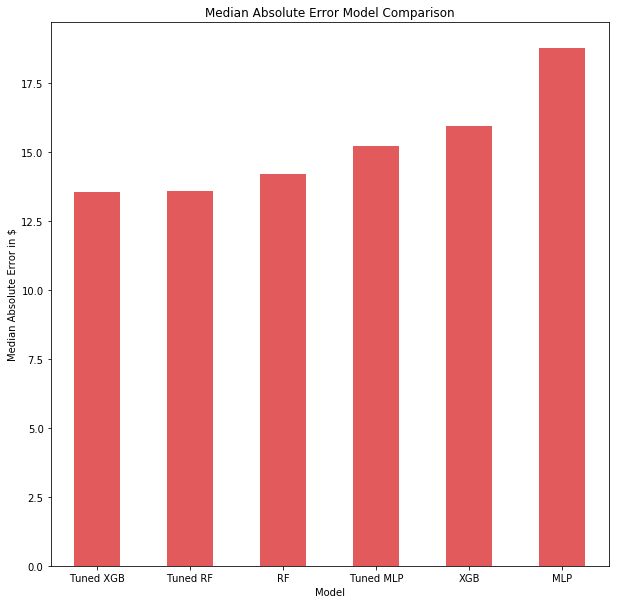

In [65]:
error_val = pd.DataFrame({'error_val':[14.2, 13.57, 15.94, 13.54, 18.76, 15.23]},
                        index = ['RF','Tuned RF','XGB', 'Tuned XGB', 'MLP', 'Tuned MLP'])
error_val = error_val.sort_values('error_val')
plt.figure(figsize=(10,10))
ax = error_val.error_val.plot(kind='bar', align = 'center', color='#E35A5C')
plt.xticks(rotation=0)
plt.xlabel('Model')
plt.ylabel('Median Absolute Error in $')
plt.title('Median Absolute Error Model Comparison')
plt.show()